In [28]:
from scipy import stats
import pandas as pd
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic

from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

Рассчет <strong><i>χ², p-value, степеней свобод, ожидаемых наблюдений</i><strong> 

In [25]:
chi2, p_value, dof, ev = stats.chi2_contingency(([20,15],[11,12],[7,9]))
print(f'''
Хи квадрат {chi2}
p - value {p_value}
Степеней свобод {dof}
Ожидаемые наблюдения
{ev}
''')


Хи квадрат 0.9544070774762996
p - value 0.6205162173513055
Степеней свобод 2
Ожидаемые наблюдения
[[17.97297297 17.02702703]
 [11.81081081 11.18918919]
 [ 8.21621622  7.78378378]]



Анализ разницы между ожидаемыми и эмпирическими значениями позволяет выявить, какие именно частоты значимо отклоняются от ожидаемых значений.

Продемонстрируем это на следующей таблице

In [26]:
df = pd.DataFrame({'Есть тромбоз': [18, 6], 'Нет тромбоза': [7, 13]}) 
df.index = ['Плацебо', 'Аспирин']
df

,Есть тромбоз,Нет тромбоза
Плацебо,18,7
Аспирин,6,13


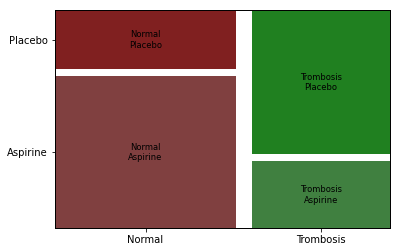

In [27]:
data = {('Normal', 'Aspirine'): 18, 
             ('Normal', 'Placebo'): 7,
             ('Trombosis', 'Aspirine'): 6,
             ('Trombosis', 'Placebo'): 13
            }

plot = mosaic(data, gap=0.05)

Разберемся, как здесь отображены наши данные. 

Ширина и высота каждого прямоугольника пропорциональны наблюдаемым частотам в соответствующих строках и столбцах. Цвет прямоугольника показывает величину стандартизированного остатка.

Чтобы можно было понять выличину этого остатка, напишем функция, которая закрашевает прямоугольники в зависимости от величины остатка. если он по модулю больше 2, то прямоугольник будет полупрозрачным и можно отвергать нулевую гипотезу об ожидаемом распределении, если больше 4, то соответствующий прямоугольник будет закрашен. 

In [48]:
def make_me_plot(data):
    # Проводим анализ таблиц сопряженности
    data = data.copy()
    obs = data.unstack().T.values # делаем из таблицы матрицу
    chi, pval, dof, est = chi2_contingency(obs)
    remains = (obs - est)  / np.sqrt(est)
    
    # Присваиваем соответствующие цвета
    hex_colors = sns.color_palette("coolwarm", 6).as_hex()
    color_labels = ['<-4', '-4:-2', '-2:0', '0:2', '2:4', '>4'][::-1] #обратный порядок
    colors = pd.Series([x  for x in remains.ravel()], index=data.index, name='color')
    valrange = np.array([-np.inf, -4, -2, 0, 2, 4, np.inf])
    color_prop = {k: {'color' : hex_colors[np.argmax(v < valrange) - 1]}  for k, v in colors.iteritems()}
    patches = [mpatches.Patch(color=c, label=l) for c, l in zip(hex_colors, color_labels)]
    # Передаем все данные matplotlib
    fig, ax = plt.subplots()
    mosaic(data, gap=.02, properties=color_prop, ax=ax, labelizer= lambda x: '')
    fig.legend(handles=patches, bbox_to_anchor=(0.6, 0., 0.5, 0.5))

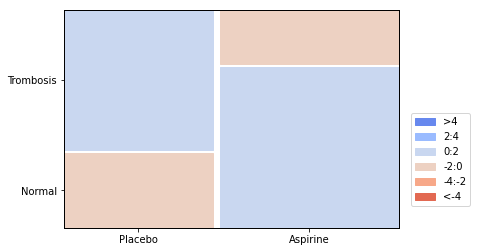

In [49]:
cure = ['Placebo', 'Aspirine']
effect = ['Normal', 'Trombosis']
idx = pd.MultiIndex.from_tuples(product(cure, effect))
data = pd.Series([7, 13, 18, 6], index=idx)
make_me_plot(data)